<h2></h2>


<h1><center><u>MAJOR PROJECT</u></center></h1>
<h2><center><u>POLLUTION IN INDIA</u></center></h2>
<h2><center><u>NOTEBOOK USED FOR MODELING</u></center></h2>
<h2 style="text-align:right">Submitted By:</h2>
<h2 style="text-align:right">-</h2>
<h2 style="text-align:right">-</h2>

<h4>Include the libraries that we are going to use</h4>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from numpy import log
from statsmodels.tsa.stattools import adfuller
import sys
from pandas.plotting import lag_plot
import numpy as np
import numpy as np
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

In [2]:
df = pd.read_csv('final.csv', index_col=0)#load the data from csv named final.csv

In [3]:
df.head()

,City,Coordinates,Time,PM10_min,PM10_max,PM10_avg,PM2.5_min,PM2.5_max,PM2.5_avg,NO2_min,...,NH3_avg,SO2_min,SO2_max,SO2_avg,CO_min,CO_max,CO_avg,OZONE_min,OZONE_max,OZONE_avg
0,Yamunanagar,"[30.2112003, 77.28638972360895]",2020-09-22 14:00:00,78.0,170.0,121.0,59.0,239.0,134.0,14.0,...,5.0,3.0,7.0,6.0,19.0,74.0,22.0,10.0,122.0,32.0
1,Karnal,"[29.6803266, 76.9896254]",2020-09-22 14:00:00,64.0,113.0,91.0,42.0,227.0,111.0,1.0,...,3.0,5.0,109.0,13.0,16.0,44.0,19.0,4.0,43.0,13.0
2,Ahmedabad,"[23.0216238, 72.5797068]",2020-09-22 14:00:00,57.0,93.0,69.0,13.0,89.0,48.0,23.0,...,NaN,4.0,121.0,28.0,10.0,77.0,37.0,4.0,127.0,52.0
3,Ajmer,"[26.4691, 74.639]",2020-09-22 14:00:00,44.0,114.0,80.0,29.0,147.0,65.0,9.0,...,5.0,9.0,12.0,11.0,24.0,82.0,42.0,6.0,83.0,61.0
4,Alwar,"[27.639077049999997, 76.6144524902045]",2020-09-22 14:00:00,68.0,95.0,81.0,60.0,81.0,71.0,13.0,...,4.0,3.0,29.0,19.0,15.0,40.0,26.0,5.0,84.0,28.0


## MUMBAI


In [4]:
tdf = df[df['City']=='Mumbai']#lets take the target city as Mumbai, then we will look at models for other cities

In [5]:
tdf.columns#remove these columns as our main focus is on PM2.5_avg we drop others columns for now

Index(['City', 'Coordinates', 'Time', 'PM10_min', 'PM10_max', 'PM10_avg',
       'PM2.5_min', 'PM2.5_max', 'PM2.5_avg', 'NO2_min', 'NO2_max', 'NO2_avg',
       'NH3_min', 'NH3_max', 'NH3_avg', 'SO2_min', 'SO2_max', 'SO2_avg',
       'CO_min', 'CO_max', 'CO_avg', 'OZONE_min', 'OZONE_max', 'OZONE_avg'],
      dtype='object')

#### After dropping these columns we set date as index and make a univariate time series

In [6]:
drop_columns=['PM10_min', 'PM10_max', 'PM10_avg', 'PM2.5_min', 'PM2.5_max'
       , 'NO2_min', 'NO2_max', 'NO2_avg', 'NH3_min', 'NH3_max',
       'NH3_avg', 'SO2_min', 'SO2_max', 'SO2_avg', 'CO_min', 'CO_max',
       'CO_avg', 'OZONE_min', 'OZONE_max', 'OZONE_avg', 'Coordinates']

In [7]:
tdf.drop(columns=drop_columns,axis=1,inplace=True)

C:\Users\pratham\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [8]:
tdf.drop(columns='City',axis=1,inplace=True)

In [9]:
tdf['Time']= pd.to_datetime(tdf['Time'],dayfirst=True)
# Set the index to the 'date' column
tdf.set_index('Time', inplace = True)
tdf.dtypes

<ipython-input-9-5eff9ba739b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['Time']= pd.to_datetime(tdf['Time'],dayfirst=True)


PM2.5_avg    float64
dtype: object

In [10]:
tdf##Final time series

,PM2.5_avg
Time,
2020-09-22 14:00:00,55.666667
2020-09-22 16:00:00,56.333333
2020-09-22 19:00:00,54.888889
2020-09-22 22:00:00,52.222222
2020-09-23 04:00:00,43.888889
...,...
2020-10-21 17:00:00,59.000000
2020-10-21 18:00:00,59.625000
2020-10-21 19:00:00,60.375000


In [11]:
b=tdf.resample('12H').mean()##resample the time series at 12H intervals

In [12]:
b=b.interpolate()##interpolating because we had somedays Nan values

<Figure size 720x720 with 0 Axes>

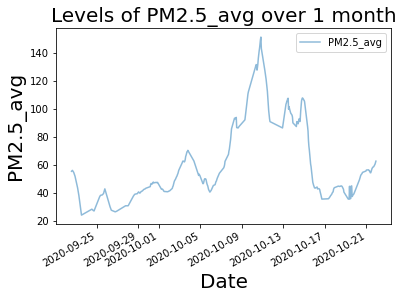

In [13]:
plt.figure(figsize=(10, 10))
tdf.plot(alpha=0.5, style='-')
plt.title('Levels of PM2.5_avg over 1 month', fontsize=20)
plt.ylabel('PM2.5_avg',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.show()

<Figure size 720x720 with 0 Axes>

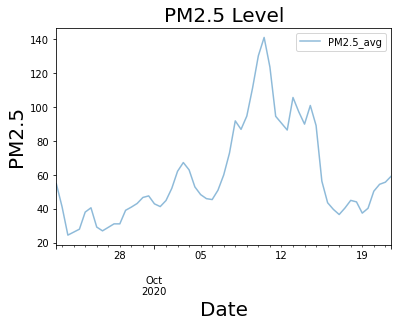

In [14]:
plt.figure(figsize=(10, 10))
b.plot(alpha=0.5, style='-')
plt.title('PM2.5 Level', fontsize=20)
plt.ylabel('PM2.5',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.show()

#### It can be observed from the plot that time series has trend and seasonality so our data is not stationary lets further verify this by performing the AD fuller test and it also confirms the value for the parameter d in ARIMA model

In [15]:
from statsmodels.tsa.stattools import adfuller
print("p-value:", adfuller(b['PM2.5_avg'].dropna())[1])

p-value: 0.19526317286755052


In [16]:
print("p-value:", adfuller(b['PM2.5_avg'].diff().dropna())[1])

p-value: 2.1356242881628268e-06


## differencing =1 i.e. d=1 in ARIMA d=1



#### As it can be clearly seen that for d=1 our data passes the AD Fuller test  now lets find out seasonality for the data

In [17]:
b['new']=b['PM2.5_avg']#made copy because there was a decimal in PM2.5_avg column name
c=b.copy()

In [18]:
c.drop(['PM2.5_avg'],axis=1,inplace=True)

In [19]:
c.groupby(pd.Grouper(freq="W")).new.idxmax()

Time
2020-09-27   2020-09-22 12:00:00
2020-10-04   2020-10-03 12:00:00
2020-10-11   2020-10-10 12:00:00
2020-10-18   2020-10-13 00:00:00
2020-10-25   2020-10-21 12:00:00
Freq: W-SUN, Name: new, dtype: datetime64[ns]

In [57]:
summary=c.groupby(pd.Grouper(freq="W")).agg(
    max_Level = pd.NamedAgg(column='new', aggfunc='max'),
    max_Date = pd.NamedAgg(column='new', aggfunc='idxmax'))

In [58]:
summary['max_Date'][1]-summary['max_Date'][2]

Timedelta('-7 days +00:00:00')

In [59]:
summary

,max_Level,max_Date
Time,,
2020-09-27,54.777778,2020-09-22 12:00:00
2020-10-04,67.319444,2020-10-03 12:00:00
2020-10-11,141.125000,2020-10-10 12:00:00
2020-10-18,105.700000,2020-10-13 00:00:00
2020-10-25,59.237500,2020-10-21 12:00:00


In [60]:
summary.shift(1)

,max_Level,max_Date
Time,,
2020-09-27,NaN,NaT
2020-10-04,54.777778,2020-09-22 12:00:00
2020-10-11,67.319444,2020-10-03 12:00:00
2020-10-18,141.125000,2020-10-10 12:00:00
2020-10-25,105.700000,2020-10-13 00:00:00


In [61]:
summary-summary.shift(1)

,max_Level,max_Date
Time,,
2020-09-27,NaN,NaT
2020-10-04,12.541667,11 days 00:00:00
2020-10-11,73.805556,7 days 00:00:00
2020-10-18,-35.425000,2 days 12:00:00
2020-10-25,-46.462500,8 days 12:00:00


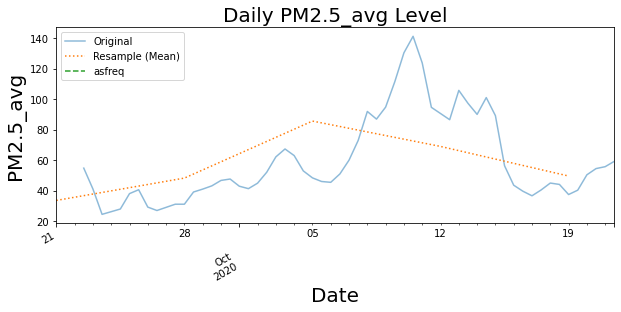

In [63]:
plt.figure(figsize=(10, 4))
ax = plt.gca()
c.plot(alpha=0.5, style='-',ax=ax)
c.resample('W').mean().plot(style=':',ax=ax)   ## Mean taken weekly
c.asfreq('W').plot(style='--',ax=ax);        
plt.legend(['Original', 'Resample (Mean)', 'asfreq'],
loc='upper left',fontsize=10);
plt.title('Daily PM2.5_avg Level', fontsize=20)
plt.ylabel('PM2.5_avg',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.show()

### Let's Decompose our data into different components and observe their plots

In [26]:
b.drop(['new'],axis=1,inplace=True)

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(b, model='multiplicative', period =7)
trend    = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [28]:
trend.head()

Time
2020-09-22 12:00:00          NaN
2020-09-23 00:00:00          NaN
2020-09-23 12:00:00          NaN
2020-09-24 00:00:00    36.194019
2020-09-24 12:00:00    32.547194
Freq: 12H, Name: trend, dtype: float64

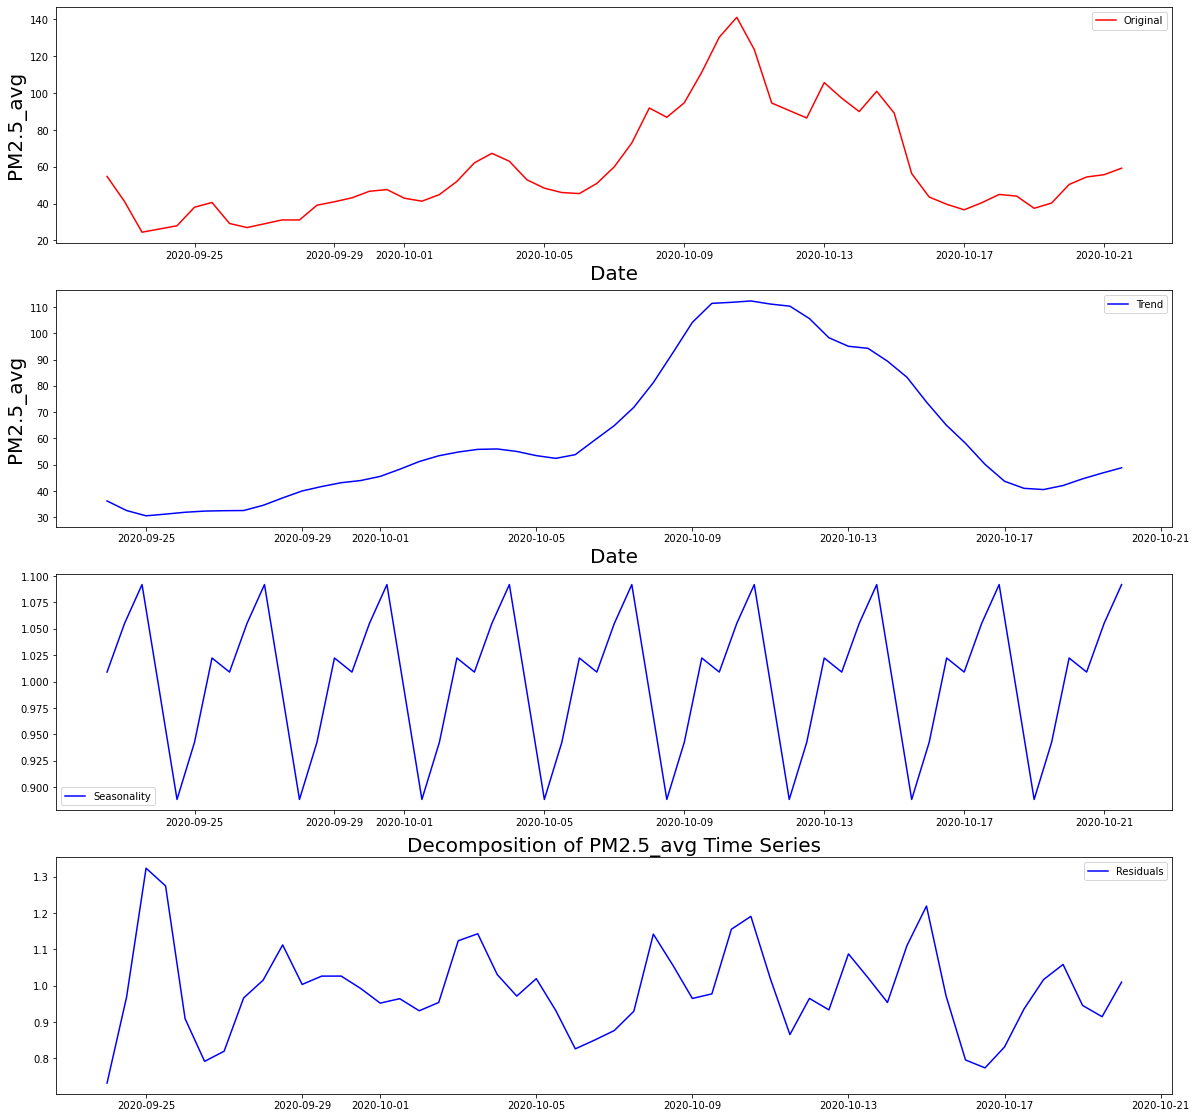

<Figure size 432x288 with 0 Axes>

In [29]:

plt.figure(figsize=(20,20))
plt.subplot(411)
plt.plot(b, label='Original', color="red")
plt.legend(loc='best')
plt.ylabel('PM2.5_avg',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.ylabel('PM2.5_avg',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.title('Decomposition of PM2.5_avg Time Series', fontsize=20)
plt.show()

plt.tight_layout()

## The plot shows that the data has both trend & seasonality. That means it is not stationary.

In [30]:
from statsmodels.tsa.stattools import adfuller
print("p-value:", adfuller(trend.dropna())[1])

p-value: 0.4165228632646243


In [31]:
#Here we have done 90/10 split of our data 
train_data=b[:datetime(2020,10,18)]
test_data=b[datetime(2020,10,19):datetime(2020,10,21)]

In [32]:
data_d = b.diff().dropna()

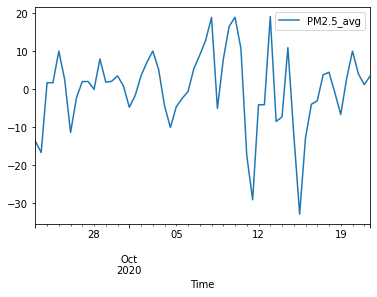

In [33]:
data_d.plot()

In [34]:
data_d.shape

(58, 1)

In [35]:
data_d.head(2)

,PM2.5_avg
Time,
2020-09-23 00:00:00,-13.645833
2020-09-23 12:00:00,-16.631944


In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

# Differenced Version with d=1


In [37]:
print("p-value:", adfuller(b['PM2.5_avg'].diff().dropna())[1])

p-value: 2.1356242881628268e-06


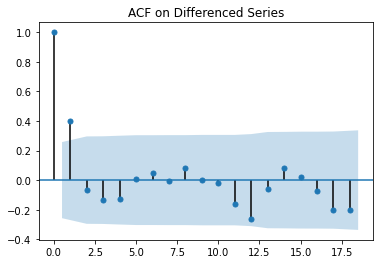

In [38]:
fig = plot_acf(b['PM2.5_avg'].diff().dropna(), 
               title="ACF on Differenced Series") 

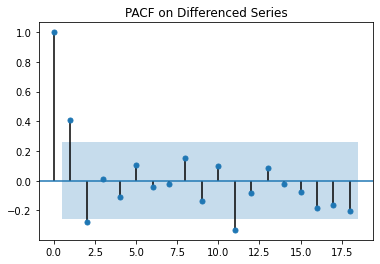

In [39]:
fig = plot_pacf(b['PM2.5_avg'].diff().dropna(), 
               title="PACF on Differenced Series") 

#### It can be seen p=2 and q=1 can be obatined from the plots and to keep our model simple we keep one of p or q=1 so lets try p,and q with different values but in range 2 and 1  and we get best results for q=1 and p=0

#### Also tried to fit the model with other parameters (p,d,q) too for the below one got the best results out of those

In [41]:
model3 = ARIMA(train_data['PM2.5_avg'], order=(0,1,1))
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.PM2.5_avg   No. Observations:                   51
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -187.381
Method:                       css-mle   S.D. of innovations              9.509
Date:                Wed, 18 Nov 2020   AIC                            380.762
Time:                        11:12:48   BIC                            386.558
Sample:                    09-23-2020   HQIC                           382.977
                         - 10-18-2020                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.2115      1.997     -0.106      0.916      -4.126       3.703
ma.L1.D.PM2.5_avg     0.5099      0.115      4.428      0.000       0.284       0.736
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.9610           +0.0000j            1.9610            0.5000
-----------------------------------------------------------------------------
"""

### As it can be seen that P>|z| for const is very high this model is not good but SARIMA models solves this with slightly better accuracy

In [42]:
fcast3=results3.forecast(5)
fcast3=pd.DataFrame({"Forecast": fcast3[0]},index=test_data.index)
residuals3 = test_data - fcast3.values
residuals3.head()

,PM2.5_avg
Time,
2020-10-19 00:00:00,-8.540667
2020-10-19 12:00:00,-5.470707
2020-10-20 00:00:00,4.807856
2020-10-20 12:00:00,9.090749
2020-10-21 00:00:00,10.551469


In [43]:
fcast3

,Forecast
Time,
2020-10-19 00:00:00,46.019834
2020-10-19 12:00:00,45.808369
2020-10-20 00:00:00,45.596905
2020-10-20 12:00:00,45.385441
2020-10-21 00:00:00,45.173977


Text(0, 0.5, 'Error')

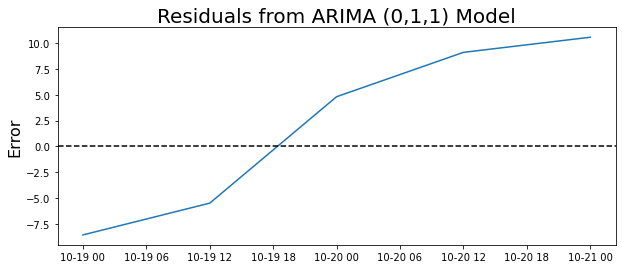

In [44]:
plt.figure(figsize=(10,4))
plt.plot(residuals3)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from ARIMA (0,1,1) Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

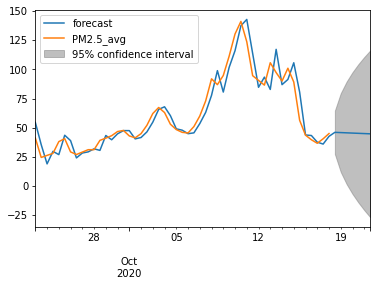

In [45]:
results3.plot_predict(1, 58)
plt.show()

In [46]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals3/test_data)),6))

Mean Absolute Percent Error: PM2.5_avg    0.163022
dtype: float64


In [47]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals3**2)))

Root Mean Squared Error: PM2.5_avg    7.999529
dtype: float64


## Finally we fit our data in Seasonal ARIMA model to get  the better forecasting

### Here we use auto arima to select the parameters for the SARIMA model

In [48]:
import pmdarima

In [49]:
from pmdarima import auto_arima
pm_arima = auto_arima(train_data['PM2.5_avg'], test = 'adf'
                      , start_p=1, start_q=1, m = 7,
                      stepwise=True, trace = True, 
                      suppress_warnings=True,
                      error_action='ignore', seasonal = True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=385.548, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=390.854, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=384.942, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=381.716, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=388.871, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=380.762, Time=0.03 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=381.598, Time=0.07 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=383.584, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=382.756, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=382.755, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=383.734, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[7]             : AIC=378.774, Time=0.01 sec
 ARIMA(0,1,1)(1,0,0)[7]             : AIC=379.599, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[7]             : AIC=379.717, 

### Fit the SARIMA Model


In [50]:
my_order = (0,1,1)
my_seasonal_order = (0, 0, 0, 7)
# define model
model4 = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)

In [51]:
#fit the model
start = time()
model4_fit = model4.fit()
end = time()
print('Model Fitting Time:', end - start)

Model Fitting Time: 0.020943880081176758


In [52]:
#summary of the model
print(model4_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              PM2.5_avg   No. Observations:                   52
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -187.387
Date:                Wed, 18 Nov 2020   AIC                            378.774
Time:                        11:13:38   BIC                            382.637
Sample:                    09-22-2020   HQIC                           380.250
                         - 10-18-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5101      0.094      5.424      0.000       0.326       0.694
sigma2        90.4398     16.663      5.427      0.000      57.780     123.099
Ljung-Box (Q):                       27.05   Jarque-

In [53]:
fcast4=model4_fit.forecast(5)
fcast4=pd.DataFrame({"Forecast": fcast4[0]},index=test_data.index)
residuals4 = test_data - fcast4.values
residuals4.head()

,PM2.5_avg
Time,
2020-10-19 00:00:00,-8.680854
2020-10-19 12:00:00,-5.822358
2020-10-20 00:00:00,4.244741
2020-10-20 12:00:00,8.316170
2020-10-21 00:00:00,9.565426


Text(0, 0.5, 'Error')

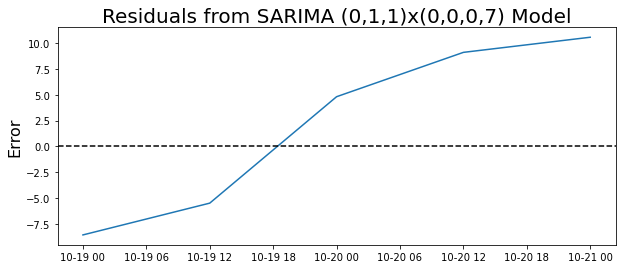

In [54]:
plt.figure(figsize=(10,4))
plt.plot(residuals3)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA (0,1,1)x(0,0,0,7) Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

In [55]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals4/test_data)),5))

Mean Absolute Percent Error: PM2.5_avg    0.1569
dtype: float64


In [56]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals4**2)))

Root Mean Squared Error: PM2.5_avg    7.588557
dtype: float64


## So as we can observe we are getting 15.69% MAPE in our final model, and every P>|z| is very small in model summary 

<hr>

<hr>